<a href="https://colab.research.google.com/github/linhmitless/StatColabNotebook/blob/master/Lab_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MATH 2310 Lab 2: Linear regression 


## 1. Initialization

As usual, we import the libraries that we need for our analysis.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

## 2. Example linear regression analysis for your reference

### Load the data

We will be working with the IMDB movies data set from the vega data sets.

In [0]:
#Import the data sets
from vega_datasets import data

Create a Pandas data frame for the movies data set.

In [0]:
df = data.movies()

For simplicity, remove any rows that have NaN's from the data frame.

In [0]:
df = df.dropna()

### Explore the data set

First look at the head of the data frame. This will show you the variables and their values for the first five rows.

In [0]:
df.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross
1064,Contemporary Fiction,Renny Harlin,20th Century Fox,5.4,8914.0,PG-13,Action,20000000.0,27-Mar-09,28.0,108.0,Original Screenplay,12 Rounds,8283859.0,12234694.0,18184083.0
1074,Science Fiction,Roland Emmerich,Sony Pictures,6.2,396.0,PG-13,Action,200000000.0,13-Nov-09,39.0,158.0,Original Screenplay,2012,50736023.0,166112167.0,766812167.0
1090,Historical Fiction,Zack Snyder,Warner Bros.,7.8,235508.0,R,Action,60000000.0,9-Mar-07,60.0,117.0,Based on Comic/Graphic Novel,300,261252400.0,210614939.0,456068181.0
1095,Historical Fiction,James Mangold,Lionsgate,7.9,98355.0,R,Western,48000000.0,2-Sep-07,89.0,117.0,Remake,3:10 to Yuma,51359371.0,53606916.0,69791889.0
1107,Contemporary Fiction,Jon Avnet,Sony Pictures,5.9,31205.0,R,Thriller/Suspense,30000000.0,18-Apr-08,5.0,106.0,Original Screenplay,88 Minutes,11385055.0,16930884.0,32955399.0


Now make a summary plot to show histograms of each numerical variable and scatter plots for each pair of numerical variables. This is called a pair plot.

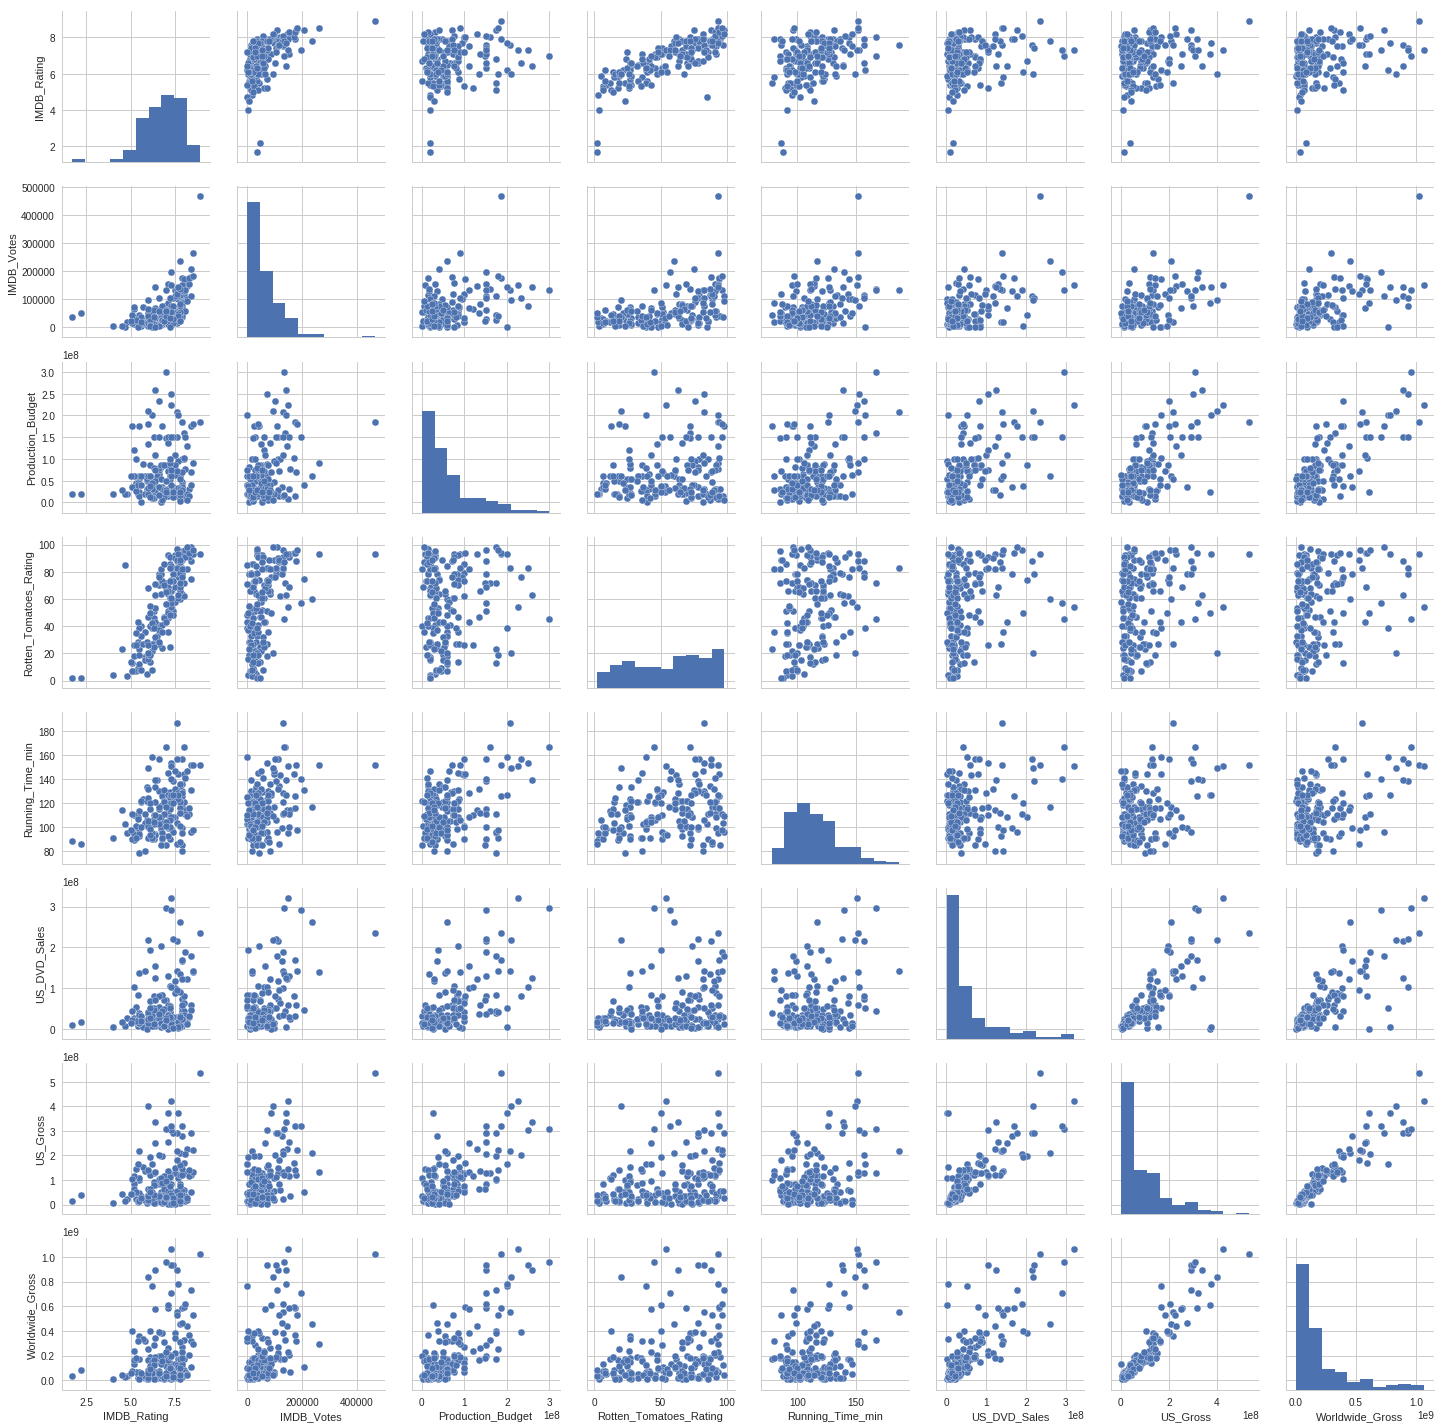

In [0]:
sns.pairplot(df)

Finally, compute summary statistics for each numerical variable.

In [0]:
df.describe()

,IMDB_Rating,IMDB_Votes,Production_Budget,Rotten_Tomatoes_Rating,Running_Time_min,US_DVD_Sales,US_Gross,Worldwide_Gross
count,174.000000,174.000000,1.740000e+02,174.000000,174.000000,1.740000e+02,1.740000e+02,1.740000e+02
mean,6.788506,62767.545977,6.680296e+07,55.724138,114.344828,5.392388e+07,9.386324e+07,2.074873e+08
std,1.093959,60418.301378,6.008128e+07,27.973641,20.116612,6.322215e+07,9.707097e+07,2.354148e+08
min,1.700000,149.000000,1.500000e+04,2.000000,78.000000,6.184540e+05,2.223293e+06,6.521829e+06
25%,6.100000,20571.000000,2.225000e+07,29.000000,99.250000,1.492860e+07,2.575447e+07,4.895248e+07
50%,7.000000,44370.500000,4.900000e+07,61.000000,111.000000,2.813295e+07,5.483773e+07,1.187267e+08
75%,7.600000,84531.000000,8.500000e+07,79.000000,126.750000,6.764799e+07,1.276575e+08,2.651107e+08
max,8.900000,465000.000000,3.000000e+08,98.000000,187.000000,3.208309e+08,5.333454e+08,1.065660e+09


### Do the regression analysis 

Let's look at the relationship between the US gross and the worldwide gross.

We can first make a simple plot that shows the scatter plot along with the regression line without having to do any work.

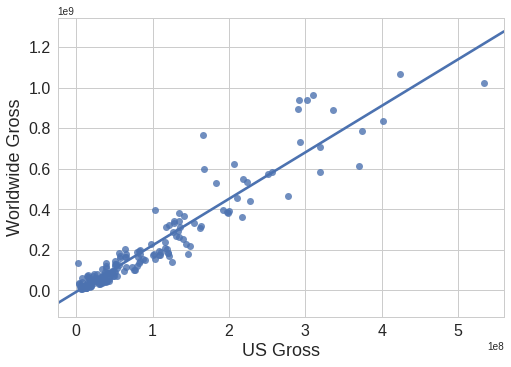

In [0]:
sns.regplot(x = df['US_Gross'], y = df['Worldwide_Gross'],ci = None)
plt.xlabel('US Gross',fontsize = 18)
plt.ylabel('Worldwide Gross',fontsize = 18)
plt.tick_params(labelsize = 16)

Now use Stats Models to find the regression line and many useful summary statistics.

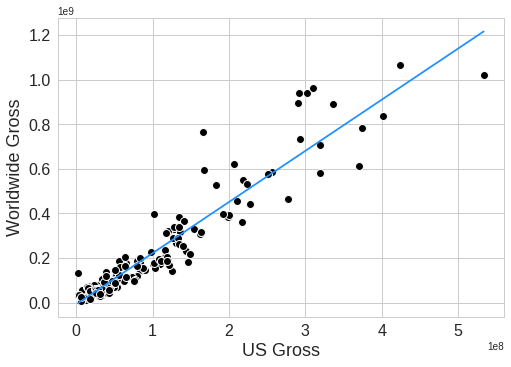

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide_Gross   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1461.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           5.46e-86
Time:                        04:39:14   Log-Likelihood:                -3404.7
No. Observations:                 174   AIC:                             6813.
Df Residuals:                     172   BIC:                             6820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.829e+06   8.09e+06     -0.968      0.335   -2.38e+07    8.14e+06
US_Gross       2.2939      0.060     38.228      0.000       2.175       2.412
==============================================================================
Omnibus:                       71.476   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.347
Skew:                           1.475   Prob(JB):                     1.24e-74
Kurtosis:                       9.184   Cond. No.                     1.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X = df['US_Gross'] 
y = df['Worldwide_Gross'] 

X = sm.add_constant(X) #This is used to include an intercept in the line

#Fit the model
model = sm.OLS(y, X).fit() 

#Define an array of x values spanning the interval where you want to plot the line. 
x = np.linspace(np.min(df['US_Gross']),np.max(df['US_Gross']),100) #generate x values where you want to plot the line

#Manual approach to defining the regression line
reg_line = model.params.const + model.params[1]*x #Use the estimated coefficients to define the line


#Plot data
plt.plot(df['US_Gross'],y,'ko',ms = 8,mec = 'w',mew = 1)
#Plot regression line
plt.plot(x,reg_line,'dodgerblue')
#Make it nice
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('US Gross',fontsize = 18)
plt.ylabel('Worldwide Gross',fontsize = 18)
plt.show()


# Print out the statistics
model.summary()

Let's assess the fit.

The output of the model summary above gives the R-squared.

We can compute the standard error from the residuals.

In [0]:
n = model.nobs

SSE = model.ssr

se = np.sqrt(SSE/(n - 2))

print(se)

76614892.6460188


We can make a residual plot to qualitatively assess the fit.

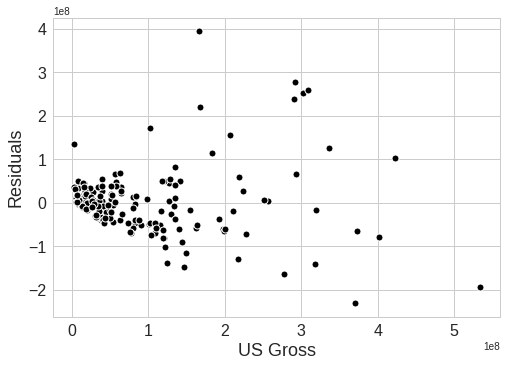

In [0]:
plt.plot(df['US_Gross'],model.resid,'ko',mec = 'w',mew = 1)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('US Gross',fontsize = 18)
plt.ylabel('Residuals',fontsize = 18)
plt.show()

This residual plot shows us that the variability around the regression line increases with US gross.

This non-uniformity of the error variability is called heteroscedasticity. When this occurs we should know that our standard error may be a biased estimate of the true variability.

Sometimes when we see heteroscedasticity, we can make a nonlinear transformation of the variables, for example using a log, but this is not always recommended.

Another way to deal with this is to apply weighted least-squares.

## 3. Lab 2: Linear Regression

### Load the cars data

We will be working with the cars data set from the vega data sets.

In [0]:
#Import the data sets
from vega_datasets import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Create a Pandas data frame for the cars data set.

In [0]:
df = data.cars()

For simplicity, remove any rows that have NaN's from the data frame.

In [0]:
df = df.dropna()

### Your lab questions

In this lab you will use the cars data set to answer the following questions:



1.   Provide a basic description of the data set.
      1.   What are the variables in your data set?
      2.   What types of variables are they (numerical or categorical)?
      3.   What is the shape of the distribution for each numerical variable?
      4.   What is the relationship between each pair of numerical variables?
2.   Provide a detailed analysis of the relationship between weight in lbs and horsepower.
      1.   What is the correlation coefficient between weight in lbs and horsepower?
      2.   What equation of the regression line to predict horsepower from weight in lbs?
      3.   Provide an assessment of the fit including: (1) the standard error, (2) the R-squared, and (3) a residual plot.
3.   Provide a detailed analysis of the relationship between miles per gallon and horsepower.
      1.   What is the correlation coefficient between miles per gallon and horsepower?
      2.   Based on a scatter plot of miles per gallon vs. horsepower, will a line be a good description of the relationship?
      3.   Is there a linear relationship between log(miles per gallon) and log(horsepower)?
      4.   What equation of the regression line to predict log(horsepower) from log(miles per gallon) ?
      5.   Provide an assessment of the fit including: (1) the standard error, (2) the R-squared, and (3) a residual plot.      



In [0]:
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


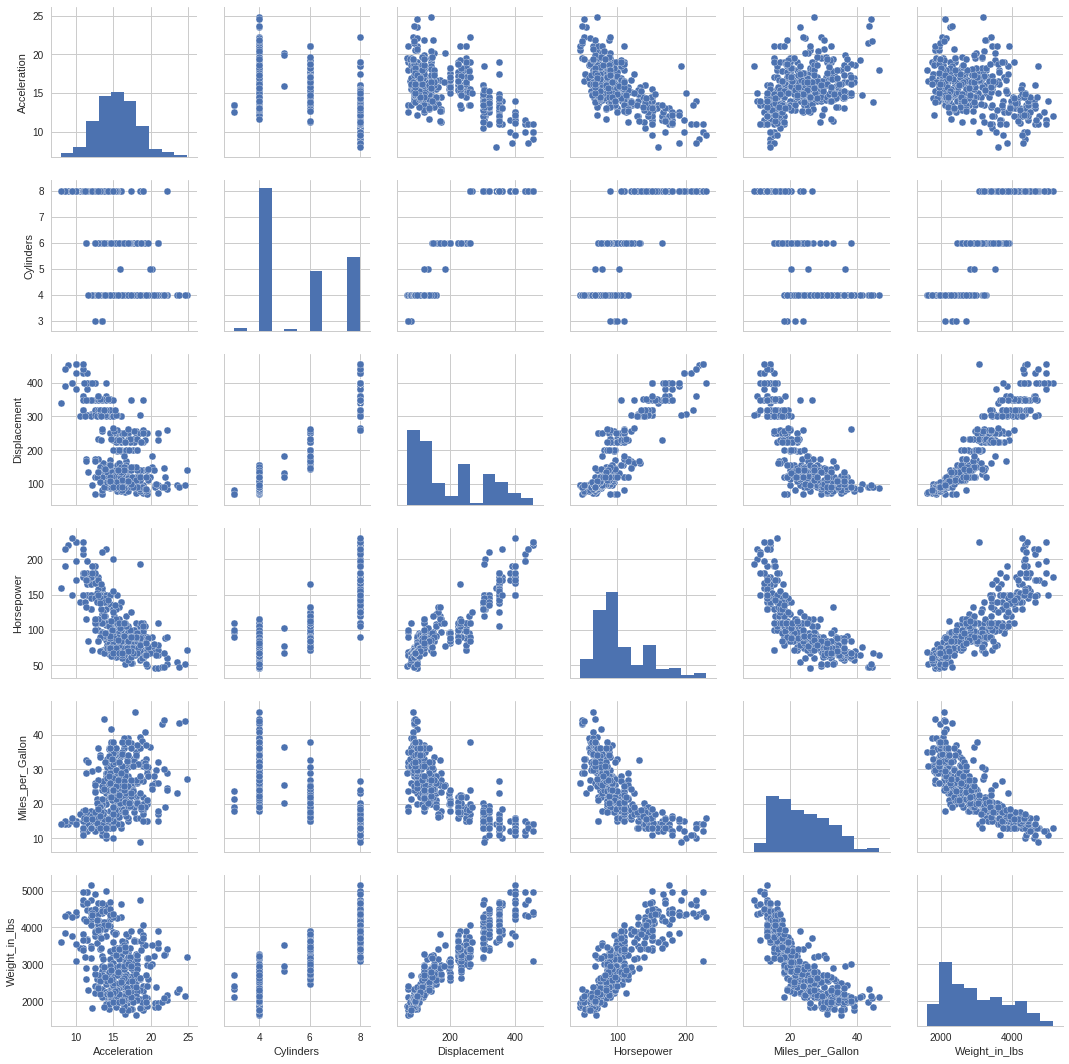

In [0]:
sns.pairplot(df)

In [0]:
df.describe()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,15.541327,5.471939,194.411990,104.469388,23.445918,2977.584184
std,2.758864,1.705783,104.644004,38.491160,7.805007,849.402560
min,8.000000,3.000000,68.000000,46.000000,9.000000,1613.000000
25%,13.775000,4.000000,105.000000,75.000000,17.000000,2225.250000
50%,15.500000,4.000000,151.000000,93.500000,22.750000,2803.500000
75%,17.025000,8.000000,275.750000,126.000000,29.000000,3614.750000
max,24.800000,8.000000,455.000000,230.000000,46.600000,5140.000000


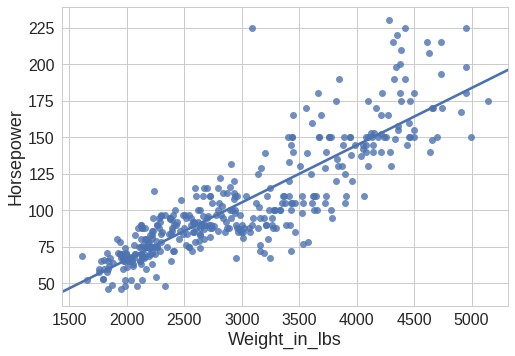

In [0]:
# regression analysis

sns.regplot(x = df['Weight_in_lbs'], y = df['Horsepower'],ci = None)
plt.xlabel('Weight_in_lbs',fontsize = 18)
plt.ylabel('Horsepower',fontsize = 18)
plt.tick_params(labelsize = 16)

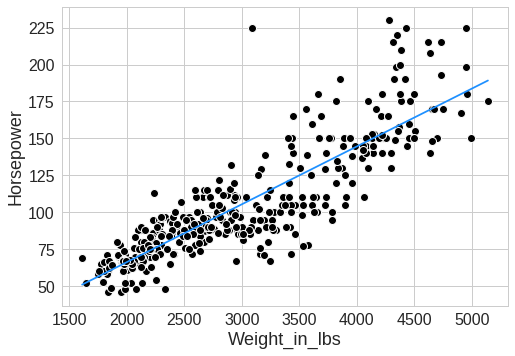

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Wed, 16 Jan 2019   Prob (F-statistic):          1.36e-118
Time:                        22:58:57   Log-Likelihood:                -1717.0
No. Observations:                 392   AIC:                             3438.
Df Residuals:                     390   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -12.1835      3.570     -3.412      0.001     -19.203      -5.164
Weight_in_lbs     0.0392      0.001     33.972      0.000       0.037       0.041
==============================================================================
Omnibus:                       83.255   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.937
Skew:                           0.892   Prob(JB):                     1.11e-68
Kurtosis:                       6.997   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
s1 = 'Weight_in_lbs'
s2 = 'Horsepower'
X = df[s1] 
y = df[s2] 

X = sm.add_constant(X) #This is used to include an intercept in the line

#Fit the model
model = sm.OLS(y, X).fit() 

#Define an array of x values spanning the interval where you want to plot the line. 
x = np.linspace(np.min(df[s1]),np.max(df[s1]),100) #generate x values where you want to plot the line

#Manual approach to defining the regression line
reg_line = model.params.const + model.params[1]*x #Use the estimated coefficients to define the line


#Plot data
plt.plot(df[s1],y,'ko',ms = 8,mec = 'w',mew = 1)
#Plot regression line
plt.plot(x,reg_line,'dodgerblue')
#Make it nice
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(s1,fontsize = 18)
plt.ylabel(s2,fontsize = 18)
plt.show()


# Print out the statistics
model.summary()


In [0]:
t = model.rsquared

corCoef = np.sqrt(t)
print(corCoef)

0.8645377375741443


This is a pretty strong correlation. It's also positive, meaning the higher the weight of the car, the higher its horsepower is. 


In [0]:
# intercept
i1 = model.params.const
print(i1)

-12.183484703459422


In [0]:
# slope
sl = model.params[1]
print(sl)

0.03917701910770019


In [0]:
y3 = i1 + sl*x


[ 51.00904712  52.40477789  53.80050866  55.19623943  56.5919702
  57.98770098  59.38343175  60.77916252  62.17489329  63.57062406
  64.96635483  66.36208561  67.75781638  69.15354715  70.54927792
  71.94500869  73.34073946  74.73647024  76.13220101  77.52793178
  78.92366255  80.31939332  81.71512409  83.11085487  84.50658564
  85.90231641  87.29804718  88.69377795  90.08950872  91.48523949
  92.88097027  94.27670104  95.67243181  97.06816258  98.46389335
  99.85962412 101.2553549  102.65108567 104.04681644 105.44254721
 106.83827798 108.23400875 109.62973953 111.0254703  112.42120107
 113.81693184 115.21266261 116.60839338 118.00412416 119.39985493
 120.7955857  122.19131647 123.58704724 124.98277801 126.37850879
 127.77423956 129.16997033 130.5657011  131.96143187 133.35716264
 134.75289342 136.14862419 137.54435496 138.94008573 140.3358165
 141.73154727 143.12727805 144.52300882 145.91873959 147.31447036
 148.71020113 150.1059319  151.50166268 152.89739345 154.29312422
 155.6888549

In [0]:
# Assessing the fit: standard error
n = model.nobs

SSE = model.ssr

se = np.sqrt(SSE/(n - 2))

print(se)

19.36920631657082


Standard error: about 20, which is not too big of a number.
R squared: 0.74 - about 74% is explained by the model

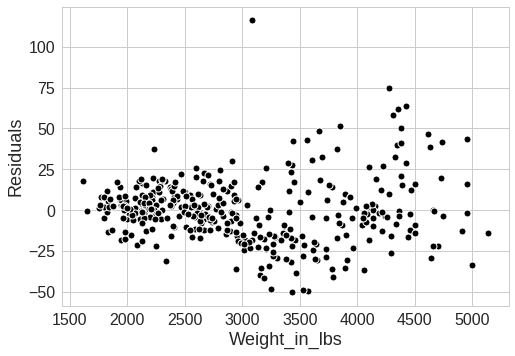

In [0]:
# the residual plot
plt.plot(df[s1],model.resid,'ko',mec = 'w',mew = 1)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel(s1,fontsize = 18)
plt.ylabel('Residuals',fontsize = 18)
plt.show()

The residual plot doesn't seem to have a definite shape. Many of the plots are clustered near 0-25 HP and 2000-3000 in lbs. There is also negative horsepower which wouldn't make sense. 

It seems to be non-constant. 